<a href="https://colab.research.google.com/github/shubhangi0001/PRODIGY_DS/blob/main/PRODIGY_DS_Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODIGY_DS_TASK-01

### Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.


### 1. Generate Data

In [2]:
import pandas as pd
import numpy as np
import random

num_records = 1000

cities = ["Ahmedabad", "Mumbai", "Bangalore", "Dehradun", "Jaipur"]
states = ["GJ", "MH", "KA", "RJ", "UK"]
jobs = ["Engineer", "Teacher", "Nurse", "Doctor", "Clerk"]
product_categories = ["Electronics", "Clothing", "Groceries", "Home", "Sports", "Beauty"]
payment_methods = ["Credit Card", "Debit Card", "PayPal", "Cash"]

data = {
    "CustomerID": [f"CUST{str(i).zfill(5)}" for i in range(1, num_records + 1)],
    "Age": [random.randint(18, 70) for _ in range(num_records)],
    "Gender": [random.choice(["Male", "Female"]) for _ in range(num_records)],
    "AnnualIncome": [random.randint(20000, 120000) for _ in range(num_records)],
    "SpendingScore": [random.randint(1, 100) for _ in range(num_records)],
    "City": [random.choice(cities) for _ in range(num_records)],
    "State": [random.choice(states) for _ in range(num_records)],
    "Country": ["USA" for _ in range(num_records)],
    "Occupation": [random.choice(jobs) for _ in range(num_records)],
    "ProductCategory": [random.choice(product_categories) for _ in range(num_records)],
    "PurchaseAmount": [round(random.uniform(10.0, 1000.0), 2) for _ in range(num_records)],
    "PaymentMethod": [random.choice(payment_methods) for _ in range(num_records)],
    "PurchaseDate": [pd.Timestamp('2023-01-01') + pd.to_timedelta(random.randint(0, 365), unit='d') for _ in range(num_records)],
    "LoyaltyCardHolder": [random.choice(["Yes", "No"]) for _ in range(num_records)],
    "OnlineShopper": [random.choice(["Yes", "No"]) for _ in range(num_records)]
}

df = pd.DataFrame(data)

df.to_csv("shopping_analysis.csv", index=False)

df.head()


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,State,Country,Occupation,ProductCategory,PurchaseAmount,PaymentMethod,PurchaseDate,LoyaltyCardHolder,OnlineShopper
0,CUST00001,60,Male,33114,72,Jaipur,RJ,USA,Doctor,Home,45.42,Credit Card,2023-03-02,Yes,No
1,CUST00002,55,Male,32518,49,Mumbai,MH,USA,Teacher,Electronics,591.08,Debit Card,2023-04-05,No,No
2,CUST00003,24,Male,57755,87,Mumbai,GJ,USA,Teacher,Beauty,159.11,PayPal,2023-04-17,Yes,Yes
3,CUST00004,63,Female,112668,21,Jaipur,UK,USA,Nurse,Home,920.97,Cash,2023-12-24,No,Yes
4,CUST00005,39,Male,49182,58,Dehradun,KA,USA,Nurse,Groceries,243.35,Cash,2023-09-24,No,No


## 2. Data Cleaning

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("shopping_analysis.csv")

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Step 1: Check for and handle missing values
# In this synthetic dataset, we shouldn't have any missing values
# But in a real scenario, you would handle missing values here
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Step 2: Ensure data types are correct
# CustomerID should be a string (which it is), so no change needed
# Age should be an integer, Gender should be a category, etc.
df['Age'] = df['Age'].astype(int)
df['Gender'] = df['Gender'].astype('category')
df['AnnualIncome'] = df['AnnualIncome'].astype(int)
df['SpendingScore'] = df['SpendingScore'].astype(int)
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['ProductCategory'] = df['ProductCategory'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['LoyaltyCardHolder'] = df['LoyaltyCardHolder'].astype('category')
df['OnlineShopper'] = df['OnlineShopper'].astype('category')

# Step 3: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 4: Normalize categorical values
# Ensuring consistent case (e.g., capitalize first letter of each word in categorical columns)
df['Gender'] = df['Gender'].str.title()
df['City'] = df['City'].str.title()
df['State'] = df['State'].str.upper()
df['Occupation'] = df['Occupation'].str.title()
df['ProductCategory'] = df['ProductCategory'].str.title()
df['PaymentMethod'] = df['PaymentMethod'].str.title()
df['LoyaltyCardHolder'] = df['LoyaltyCardHolder'].str.title()
df['OnlineShopper'] = df['OnlineShopper'].str.title()

# Step 5: Handle outliers if necessary
# Example: Cap ages to a reasonable range (e.g., 18-70)
df.loc[df['Age'] < 18, 'Age'] = 18
df.loc[df['Age'] > 70, 'Age'] = 70

# Example: Cap purchase amounts to a reasonable range (e.g., 10-1000)
df.loc[df['PurchaseAmount'] < 10.0, 'PurchaseAmount'] = 10.0
df.loc[df['PurchaseAmount'] > 1000.0, 'PurchaseAmount'] = 1000.0

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())

# Save the cleaned dataset
df.to_csv("cleaned_shopping_analysis.csv", index=False)

Initial Dataset:
  CustomerID  Age  Gender  AnnualIncome  SpendingScore      City State  \
0  CUST00001   60    Male         33114             72    Jaipur    RJ   
1  CUST00002   55    Male         32518             49    Mumbai    MH   
2  CUST00003   24    Male         57755             87    Mumbai    GJ   
3  CUST00004   63  Female        112668             21    Jaipur    UK   
4  CUST00005   39    Male         49182             58  Dehradun    KA   

  Country Occupation ProductCategory  PurchaseAmount PaymentMethod  \
0     USA     Doctor            Home           45.42   Credit Card   
1     USA    Teacher     Electronics          591.08    Debit Card   
2     USA    Teacher          Beauty          159.11        PayPal   
3     USA      Nurse            Home          920.97          Cash   
4     USA      Nurse       Groceries          243.35          Cash   

  PurchaseDate LoyaltyCardHolder OnlineShopper  
0   2023-03-02               Yes            No  
1   2023-04-05     

## 3. Data Visualization

*   Bar Chart for Gender Distribution




<ipython-input-4-a53d6d9dddaf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


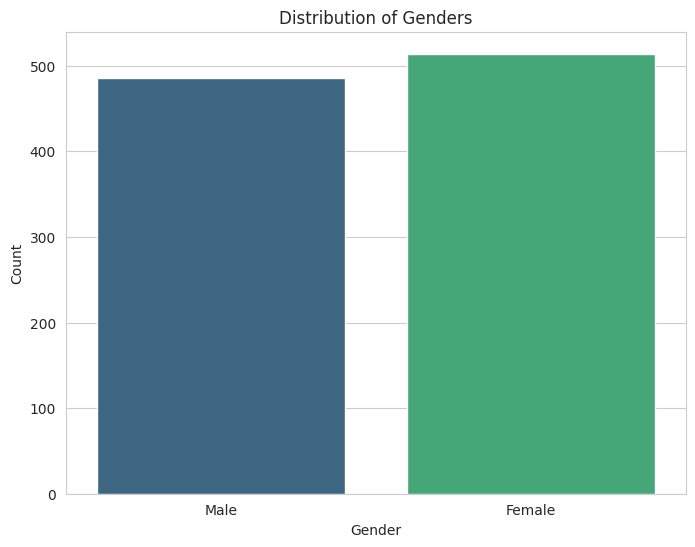

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_shopping_analysis.csv")

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

*   Histogram for Age Distribution

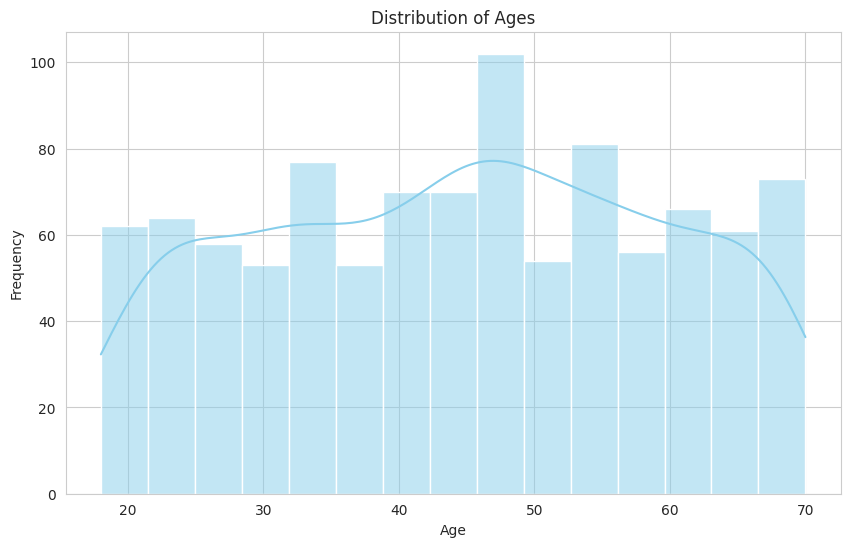

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_shopping_analysis.csv")

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*   Pie Chart for Payment Methods

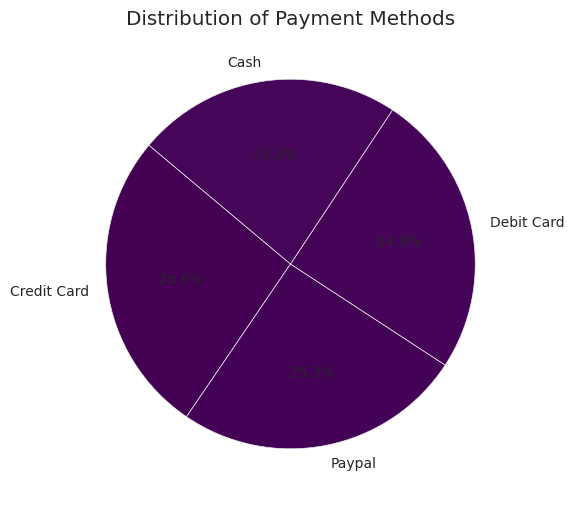

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_shopping_analysis.csv")

plt.style.use('ggplot')

payment_counts = df['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title('Distribution of Payment Methods')
plt.show()

*   Box Plot for Annual Income by Gender

<ipython-input-8-78f632654c64>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='AnnualIncome', data=df, palette='viridis')


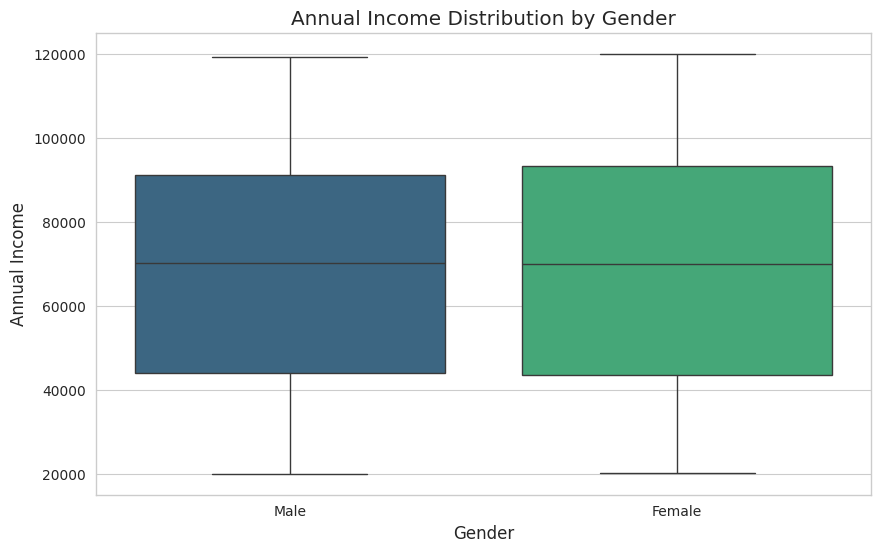

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_shopping_analysis.csv")

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='AnnualIncome', data=df, palette='viridis')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()


*   Line Chart for Monthly Purchases

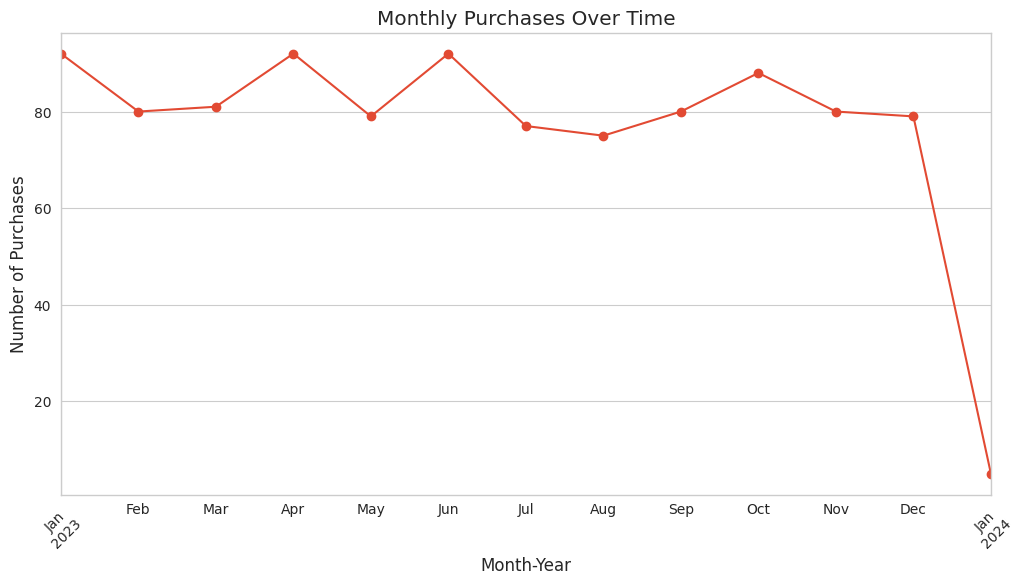

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_shopping_analysis.csv")

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

df['MonthYear'] = df['PurchaseDate'].dt.to_period('M')

monthly_purchases = df.groupby('MonthYear').size()

plt.figure(figsize=(12, 6))
monthly_purchases.plot(kind='line', marker='o')
plt.title('Monthly Purchases Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()